In [39]:
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import torch
from tqdm import tqdm

In [2]:
# If not already done, change current dir to 'Datasetv2/Goal/Labels/'
if os.getcwd().split('/')[-1] != 'Labels':
    os.chdir('Datasetv2/Goal/Labels/')
    print('Changed current dir to', os.getcwd())

Changed current dir to /home/vgaspar/Documents/TFE/banner-replacement/Datasetv2/Goal/Labels


In [3]:
labels = os.listdir()
labels

['Stadium_1_Match_1_in190.png',
 'Stadium_1_Match_3_in196.png',
 'Stadium_4_Match_1_in_1fps_1263.png',
 'Stadium_1_Match_1_in151.png',
 'Stadium_1_Match_4_in_test_v1_136.png',
 'Stadium_5_Match_2_in_1fps_4281.png',
 'Stadium_4_Match_1_in_1fps_6457.png',
 'Stadium_6_Match_1_in_1fps_4569.png',
 'Stadium_3_Match_1_in017.png',
 'Stadium_5_Match_2_in113.png',
 'Stadium_6_Match_2_in_1fps_2155.png',
 'Stadium_6_Match_2_in161.png',
 'Stadium_6_Match_1_in_1fps_2357.png',
 'Stadium_5_Match_1_in_1fps_5688.png',
 'Stadium_4_Match_1_in_1fps_0494.png',
 'Stadium_1_Match_2_in_1fps_6156.png',
 'Stadium_3_Match_1_in_1fps_0376.png',
 'Stadium_3_Match_1_in023.png',
 'Stadium_1_Match_3_in_1fps_2339.png',
 'Stadium_4_Match_2_in_1fps_2720.png',
 'Stadium_5_Match_1_in034.png',
 'Stadium_8_Match_1_in032.png',
 'Stadium_7_Match_1_in016.png',
 'Stadium_5_Match_2_in023.png',
 'Stadium_1_Match_1_in100.png',
 'Stadium_3_Match_1_in100.png',
 'Stadium_1_Match_4_in_test_v1_086.png',
 'Stadium_5_Match_2_in_1fps_0972.p

In [4]:
len(labels)

1651

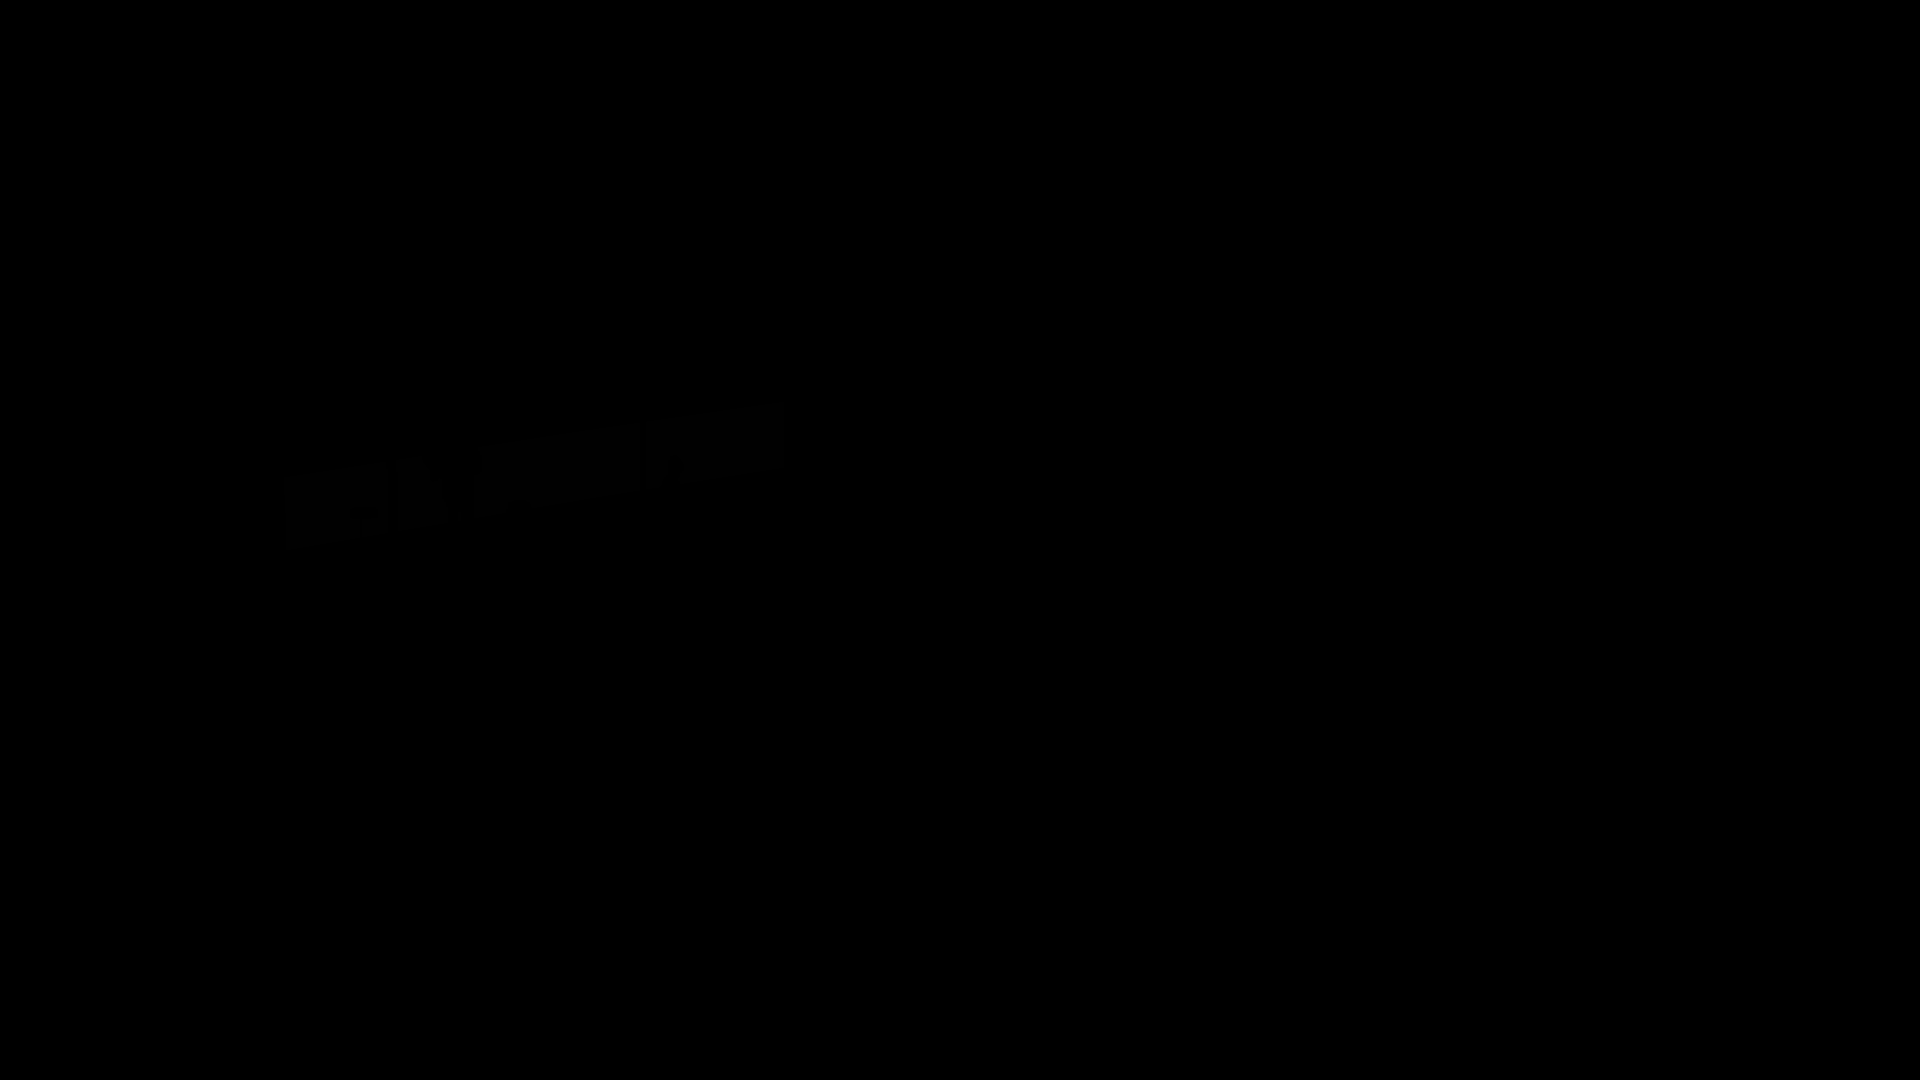

In [5]:
label = Image.open(labels[0])
label

In [6]:
# Conevert to numpy array
label = np.array(label, dtype=np.uint8)
label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [37]:
# For each column of the image, get the distance between the first and last 1 values


def get_distance(column):
    try:
        first = column.tolist().index(1)
        last = len(column) - column[::-1].tolist().index(1)
        return last - first
    except ValueError:
        return 0


# Get the distance for each column
distances = np.apply_along_axis(get_distance, 0, label)
distances

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
distances.shape

(1920,)

In [13]:
# Remove from 'distances' the zero values
distances = distances[distances != 0]
distances

array([18, 36, 73, 73, 73, 73, 74, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73,
       73, 73, 73, 73, 73, 73, 73, 73, 72, 73, 73, 73, 73, 72, 72, 73, 73,
       73, 73, 72, 72, 72, 73, 73, 73, 72, 72, 72, 73, 73, 73, 72, 72, 72,
       73, 73, 73, 72, 72, 72, 72, 73, 73, 72, 72, 72, 72, 73, 73, 72, 72,
       72, 72, 73, 72, 72, 72, 72, 72, 41, 42, 72, 72, 72, 72, 72, 72, 72,
       72, 72, 72, 72, 71, 72, 72, 72, 72, 72, 71, 72, 72, 72, 72, 72, 71,
       64, 64, 12, 12, 71, 72, 72, 72, 71, 71, 71, 71, 72, 72, 71, 71, 71,
       71, 72, 72, 71, 71, 71, 71, 72, 72, 71, 71, 67, 64, 63, 62, 59, 58,
       57, 56, 46, 45, 43, 43, 44, 44, 44, 44, 45, 46, 45, 45, 25, 25, 21,
       21, 16, 16,  9,  9,  9, 43, 43, 43, 43, 71, 70, 70, 70, 71, 71, 71,
       70, 70, 70, 70, 71, 71, 70, 70, 70, 70, 71, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 66, 66, 60, 60, 60, 60, 59, 59, 58, 59, 59, 59, 59,
       59, 59, 60, 60, 60, 60, 60, 61, 63, 63, 63, 65, 68, 69, 69, 70, 70,
       70, 69, 69, 69, 70

In [14]:
np.max(distances)

74

In [16]:
# get index of the max value
np.argmax(distances)

6

In [41]:
zooms = []
for label in tqdm(labels):
    zooms.append(np.apply_along_axis(get_distance, 0, np.array(Image.open(label), dtype=np.uint8)).max())

100%|██████████| 1651/1651 [00:43<00:00, 38.33it/s]


In [42]:
zooms = np.array(zooms)
zooms.shape

(1651,)

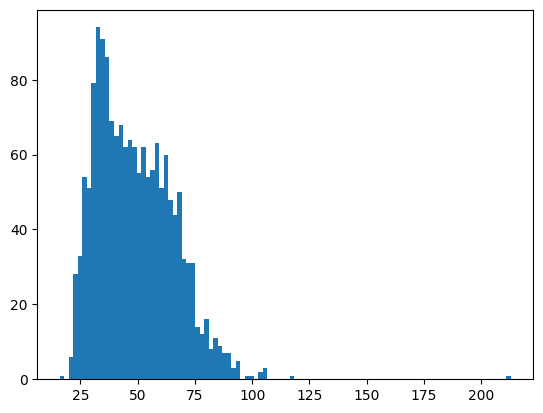

In [43]:
# Draw an histogram of the zooms
plt.hist(zooms, bins=100)
plt.show()